
<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
        <a class="navbar-brand" href="0_Forside.ipynb" target="_self"> <h2> &uarr; Tilbake til forsiden</h2></a>
    </div>
  </div>
</nav>

# Hastighetsberegning

**Læringsmål:**
* Analyse av datasett
* Enkel numerisk derivasjon

**Oversikt:**
* [Oppgave a) Snittfart](#oppg_9a)
* [Oppgave b) Hastighet i intervall](#oppg_9b)
* [Oppgave c) Hastighet ved stort antall målinger](#oppg_9c)
* [Oppgave d) Håndtering og plotting av datasett](#oppg_9d)



<a id="oppg_9a"></a>
## a)

Numerisk derivasjon handler om å finne en tilnærming til den matematisk deriverte. Se for deg at en venn lurer på hvor raskt han kan løpe. Du har ingen stoppeklokke på deg, men kan notere deg tiden når han starter, og når han slutter. Dere bestemmer dere for å bruke en strekning på 100 meter. Da kan du ved hjelp av numerisk derivasjon finne snittfarten hans gjennom løpet, ved å bruke formelen for gjennomsnittshastighet:

$$\text{gjennomsnittshastighet} = \frac{\text{avlagt strekning}}{\text{forbrukt tid}}$$

Implementer en funksjon nedenfor som tar inn en start-tid og slutt-tid, som returnerer snitthastigheten over løpet. Du kan gå ut ifra at løpsdistansen er lik $100$ meter uansett. Skriv gjerne funksjonskall for å teste funksjonen din, men merk at om du tester funksjonen din vil svaret gies i meter per sekund. For å gjøre om til kilometer per time ganger du med 3.6

In [17]:
def v_snitt(t0, t1):
    #-------------------------------------
    delta_t = t1-t0
    v = 100/delta_t
    return v

print(f'Gjennomsnittshastighet = {v_snitt(0,15)*3.6}km/s')
    #-------------------------------------

Gjennomsnittshastighet = 24.0km/s


In [ ]:
# Denne cellen brukes under retting. La stå!

Etter løpet er kompisen din litt skuffet. Han har tidligere funnet hastigheten sin med smartklokke og oppnåd høyere hastigheter. Du vet heldigvis at farten dere fant bare var snittfart over 100 meter. I starten av løpet måtte han akselerere opp, og dette vil dra ned snittfarten hans. Du foreslår derfor istedenfor at dere måler snittfarta i et mye kortere intervall av banen ca. på midten av 100-meter strekningen, da det er tenkelig at han holder maksfart i dette området. <!--Vi at i tilegg til start og slutt kan du notere ned tiden i midten av løpet. Da vil ikke akselerasjonen fra starten dra ned snitthastigheten.--> Dere finner ut at dere nå trenger å notere 4 forskjellige verdier for å finne regne ut farten:

* Posisjonen $x_1$ til første sjekkpunkt (i meter).
* Tidspunkt $t_1$ for passering av første sjekkpunkt (i sekund).
* Posisjonen $x_2$ til andre sjekkpunkt (i meter).
* Tidspunkt $t_2$ for passering av andre sjekkpunkt (i sekund).

Vi finner hastigheten ved å regne *differansen* mellom sjekkpunkt-plasseringer, og dele på *differansen* mellom tidspunkt for passering:

$$v_1 = \frac{\Delta x_1}{\Delta t_1} = \frac{x_2 - x_1}{t_2 - t_1}$$

<a id="oppg_9b"></a>
## b)

Implementer en funksjon som tar inn verdiene $x_1$, $x_2$, $t_1$ og $t_2$, og finner snitthastigheten i dette intervallet. <!--Intervallene blir 50 meter hver, men la oss tenke litt frem i tid. Det kan jo være at kompisen din ikke er helt fornøyd med dette heller, og ønsker flere intervaller. Derfor kan det være lurt om funksjonen tar inn hvor langt intervallet er også.-->

<!--Hint: for å returnere to tall i python kan du skrive `return tall0, tall1`-->

In [18]:
def v_intervall(x_1, x_2, t_1, t_2):
    #-------------------------------------
    delta_x = x_2-x_1
    delta_t = t_2-t_1
    v = delta_x/delta_t
    return v

print(f'Snitthastighet i intervallet er {v_intervall(51,49,4.85,4.8)*3.6}km/s')
    #-------------------------------------

Snitthastighet i intervallet er 144.0000000000005km/s


In [ ]:
# Denne cellen brukes under retting. La stå!

Kompisen din er litt mindre skuffet denne gangen, men han oppnådde fremdeles høyere hastighet med smartklokken sin. Dere bestemmer dere for å ta en ny test, og forsøke å danne et bilde av hvordan farten hans utvikler seg over tid. Denne gangen skal du notere ned tiden for hver meter han løper. Dette blir da 101 datapunkter ettersom at start og slutt er med. Skulle du laget en funksjon for 101 datapunkter hadde du nok sittet en stund, derfor er det veldig praktisk å bruke lister for akkurat dette.

<a id="oppg_9c"></a>
## c)

Din oppgave er derfor å lage en funksjon som tar inn en liste med passeringstidspunkt `t_n` *og* en liste med posisjoner `x_n`. Funksjonen skal returnere en liste med hastigheter for hvert intervall mellom sjekkpunktene. Her er det veldig praktisk å bruke en for-løkke. Merk at siden hastigheten er *mellom* to tider vil listen være ett element kortere, slik at for $N$ datapunkter vil vi få en liste med $N-1$ hastighetsberegnigner. 

Obs! I funksjonsdeklerasjonen står det "`x_n: list[float], t_n: list[float]`". Dette er en måte å fortelle at argumentene `t_n` og `x_n` skal være av typen liste, og denne listen inneholder flyttall.

In [27]:
def v_serie(x_n: list[float], t_n: list[float]):
    #-------------------------------------
    hastighet = []
    for i in range(len(x_n)-1):
        delta_x = x_n[i+1] - x_n[i]
        delta_t = t_n[i+1] - t_n[i]
        hastighet.append(delta_x/delta_t)
    return hastighet
    #-------------------------------------

# Bruk noen korte lister som for eksempel x_n = [0, 1, 2] og t_n = [0, 0.1, 0.17] til å teste funksjonen din
#-------------------------------------
x_n = [0, 1, 2]
t_n = [0, 0.1, 0.17]
v_serie(x_n, t_n)
#-------------------------------------

[10.0, 14.285714285714285]

Måledataen finner du i fila `sprintmålinger.csv` i mappen `Data`, og kan lastes inn med bruk av Pandas slik vi gjorde med nedbørsdataen.

In [ ]:
# Importer biblioteker
import pandas as pd

# Hent data fra fil
df = pd.read_csv("Data/sprintmålinger.csv", delimiter=";", decimal=".") # Kolonner separert med semikolon (;), desimaltegn er lik komma (,)
timestamps = list(pd.to_numeric(df["Tid (s)"]))
checkpoints = list(pd.to_numeric(df["Strekning (m)"]))

<a id="oppg_9d"></a>
## d)
Bruk funksjonen din fra deloppgave **c)** og pyplot til å plotte en kurve av hastigheten til kompisen din over tid. Det kan å være lurt å legge til et element med hastighet lik $0$ helt i starten.

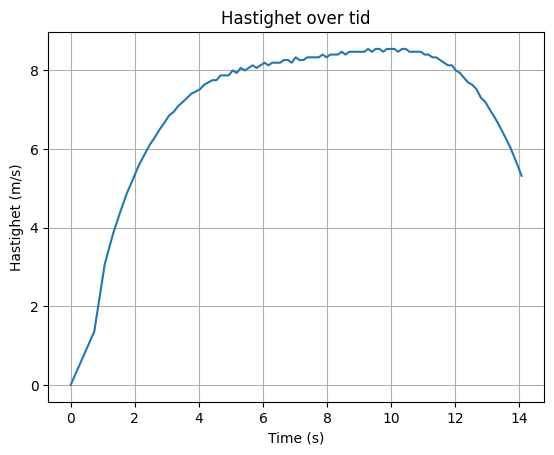

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
#-------------------------------------
# Hent data fra fil
df = pd.read_csv("Data/sprintmålinger.csv", delimiter=";", decimal=".") # Kolonner separert med semikolon (;), desimaltegn er lik komma (,)
timestamps = list(pd.to_numeric(df["Tid (s)"]))
checkpoints = list(pd.to_numeric(df["Strekning (m)"]))

# bruk funksjon frå oppgave c til å kalkulere hastighet
def v_serie(x_n: list[float], t_n: list[float]):
    hastighet = []
    for i in range(len(x_n)-1):
        delta_x = x_n[i+1] - x_n[i]
        delta_t = t_n[i+1] - t_n[i]
        hastighet.append(delta_x/delta_t)
    return hastighet

# Kjører csv data i funksjon og lagrer svar i variabel, med 0 som startfart.
hastigheter = [0] + v_serie(checkpoints, timestamps)

plt.plot(timestamps,hastigheter)
plt.title('Hastighet over tid')
plt.ylabel('Hastighet (m/s)')
plt.xlabel('Time (s)')
plt.grid()

#-------------------------------------

Nå er kompisen din fornøyd! Han får samme resultat som med smartklokken og kan være sikker på at hans toppfart er relatvit presis.<br>
*NB! Har du løst oppgaven riktig vil den se noe [slik](Figurer/oppg9d_lf.png) ut.*
<!--
DENNE KODEN BLE BRUKT FOR Å GENERERE DATASETT:

import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd

slope = 0.009
midpoint = 7.6
offset = 0.11

def a(x):
    return slope*(midpoint-x)**3 + offset
def a_int(x):
    return -slope/4*(midpoint-x)**4+offset*x
def v(x):
    return a_int(x) - a_int(0)

def v_int(x):
    return slope/20*(midpoint-x)**5 + offset/2*x**2 - a_int(0)*x

def s(x):
    return v_int(x) - v_int(0)

t = np.linspace(0, 15, 501)
plt.plot(t, a(t))
plt.plot(t, v(t))
plt.plot(t, s(t))

def numDiff(f, x, h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)

def newton_solve(f, y, x_eval=0, tol=1e-6):
    
    while abs(f(x_eval)-y) > tol:
        x_eval -= (f(x_eval)-y)/numDiff(f, x_eval)
    return x_eval

def midpoint_solve(f, a, b, y=0, tol=1e-6):
    midpoint = (b+a)/2
    while abs(f(midpoint)-y) > tol:
        if (f(midpoint)-y)*numDiff(f, midpoint)<0 :
            a = midpoint
        else:
            b = midpoint
        midpoint = (b+a)/2
    return midpoint

timestamps =[0]
for dist in range(1, 101):
    timestamps.append(midpoint_solve(s, 0, 15, dist))


timestamps_df = pd.DataFrame({"Tid (s)":timestamps, "Strekning (m)": np.linspace(0, 100, 101)})
timestamps_df.to_csv("sprintmålinger.csv", index=False, sep=";")

-->

<br>
<nav class="navbar navbar-default">
        <div class="container-fluid">
            <div class="navbar-header" style="float: left">
                <a class="navbar-brand" href="8_Fakultet.ipynb" target="_self">&lt; Forrige side: <i>fakultet</i></a>
                </div>
            <div class="navbar-header" style="float: right">
                <a class="navbar-brand" href="10_Plotting_av_flere_kurver.ipynb" target="_self">Neste side: <i>plotting av flere kurver</i> &gt;</a>
            </div>
        </div>
</nav>